In [2]:
import sqlalchemy
import matplotlib.pyplot as plt 
import pandas as pd
pd.option_context('display.max_rows',None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
from math import sqrt, ceil
import fbprophet
add_data_path = r'C:\Users\ahmed\OneDrive\Desktop\CODE_PFE_ETL\prev\rnn\data\convertcsv.csv'
add_d21_path = r'C:\Users\ahmed\OneDrive\Desktop\CODE_PFE_ETL\prev\rnn\data\d2021.csv'


#Importation des données de la base MSSQL avec sqlalchemy
def connexion_bd():
    server="localhost"
    database="GIPA"
    driver ="ODBC Driver 17 for SQL Server"
    con = f'mssql://@{server}/{database}?driver={driver}'
    engine = sqlalchemy.create_engine(con,fast_executemany=True)
    con = engine.connect()
    sql = "select Article,DateFacture,CA from GIPA.dbo.faits_resultat"
    df = pd.read_sql(sql,con)  #mise en place des données dans un DataFrame 
    return df



def transformation_données_2021():
    data21 = pd.read_csv(add_d21_path)
    data21.drop("Date",axis=1,inplace=True)
    array_d21 = np.array(data21)
    return array_d21



Importing plotly failed. Interactive plots will not work.


In [3]:
df = connexion_bd()

In [4]:
df['DateFacture'] = pd.DatetimeIndex(df['DateFacture'])

In [5]:
df.index = df['DateFacture']

In [6]:
group = df.groupby(pd.Grouper(freq='M'))  # update for v0.21+
df_c = group.sum()

In [7]:
df_c

,CA
DateFacture,
2019-01-31,5917814.788
2019-02-28,9089873.631
2019-03-31,17684297.097
2019-04-30,14451754.087
2019-05-31,17113102.259
2019-06-30,29051870.934
2019-07-31,36080527.430
2019-08-31,25598942.010
2019-09-30,9243295.357


In [8]:
    #importation des données de validation
data_test = pd.read_csv(add_data_path)
data_test.set_index('Date',inplace=True)
#jointure des deux df 
df_finale = pd.concat([data_test,df_c])
   

In [9]:
df_finale.reset_index(inplace=True)

In [10]:
df_finale['index'] = pd.to_datetime(df_finale['index'])

In [11]:
df_finale.columns = ['ds','y']

In [12]:
model = fbprophet.Prophet()

In [13]:
model.fit(df_finale)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ahmed\anaconda3\envs\streamlitenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [14]:
future_dates=model.make_future_dataframe(periods=12,freq='M')


In [15]:
prevision = model.predict(future_dates[60:72])


C:\Users\ahmed\anaconda3\envs\streamlitenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\ahmed\anaconda3\envs\streamlitenv\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [16]:
prevision

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-31,16358783.879,5630122.578,11671787.314,16358783.877,16358783.881,-7714837.637,-7714837.637,-7714837.637,-7714837.637,-7714837.637,-7714837.637,0.000,0.000,0.000,8643946.242
1,2021-02-28,16385230.296,9812232.800,15807814.481,16385230.288,16385230.305,-3657498.818,-3657498.818,-3657498.818,-3657498.818,-3657498.818,-3657498.818,0.000,0.000,0.000,12727731.478
2,2021-03-31,16414510.257,13570755.420,19451325.479,16414510.239,16414510.280,26188.106,26188.106,26188.106,26188.106,26188.106,26188.106,0.000,0.000,0.000,16440698.363
3,2021-04-30,16442845.704,12443354.243,18043054.860,16442845.672,16442845.742,-1168191.062,-1168191.062,-1168191.062,-1168191.062,-1168191.062,-1168191.062,0.000,0.000,0.000,15274654.642
4,2021-05-31,16472125.666,19074225.437,25184943.249,16472125.619,16472125.721,5548485.291,5548485.291,5548485.291,5548485.291,5548485.291,5548485.291,0.000,0.000,0.000,22020610.957
5,2021-06-30,16500461.113,28336738.689,34049537.879,16500461.049,16500461.188,14779628.100,14779628.100,14779628.100,14779628.100,14779628.100,14779628.100,0.000,0.000,0.000,31280089.212
6,2021-07-31,16529741.074,28722091.664,34889381.039,16529740.991,16529741.168,15311266.712,15311266.712,15311266.712,15311266.712,15311266.712,15311266.712,0.000,0.000,0.000,31841007.786
7,2021-08-31,16559021.036,18392244.806,24382362.311,16559020.932,16559021.154,4926607.312,4926607.312,4926607.312,4926607.312,4926607.312,4926607.312,0.000,0.000,0.000,21485628.348
8,2021-09-30,16587356.483,4756876.033,10712755.498,16587356.363,16587356.627,-8729643.039,-8729643.039,-8729643.039,-8729643.039,-8729643.039,-8729643.039,0.000,0.000,0.000,7857713.443
9,2021-10-31,16616636.444,4158136.482,9853486.466,16616636.308,16616636.615,-9507001.580,-9507001.580,-9507001.580,-9507001.580,-9507001.580,-9507001.580,0.000,0.000,0.000,7109634.864


In [17]:
df_resultat = pd.DataFrame()
array_d21 = transformation_données_2021()
df_resultat['donnees reelles'] = pd.DataFrame(array_d21)
df_resultat['previsions'] = prevision['yhat']

In [18]:
df_resultat

,donnees reelles,previsions
0,10383832.490,8643946.242
1,9885975.820,12727731.478
2,10342805.460,16440698.363
3,10626768.800,15274654.642
4,23938735.400,22020610.957
5,32987884.600,31280089.212
6,33342000.490,31841007.786
7,28825611.200,21485628.348
8,9521883.300,7857713.443
9,8235559.580,7109634.864


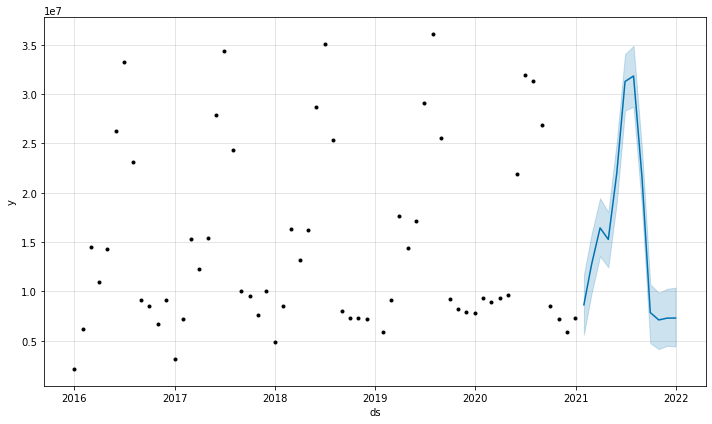

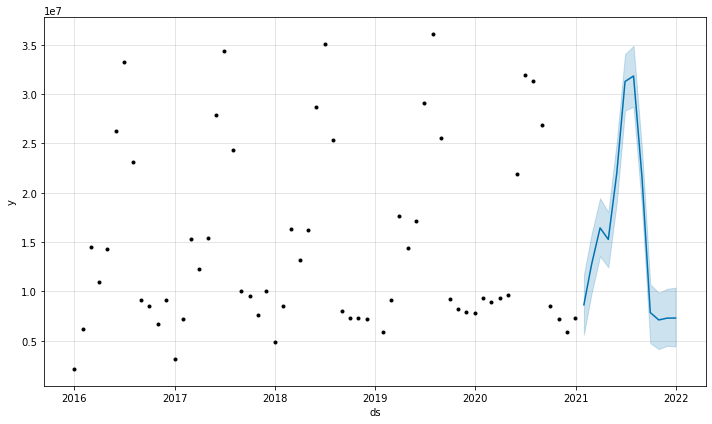

In [19]:
model.plot(prevision)

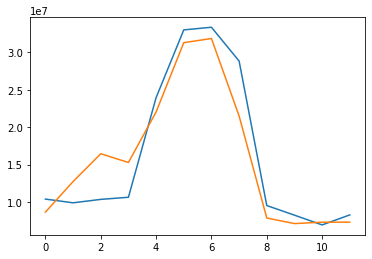

In [20]:
plt.plot(array_d21)
plt.plot(prevision['yhat'])
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
prevScore = sqrt(mean_squared_error(array_d21,prevision['yhat']))
print('RMSE des prévisions par rapport au données réelles: %.2f RMSE' % (prevScore))


RMSE des prévisions par rapport au données réelles: 3387648.70 RMSE
